In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- QUESTION 1 

 -  ce code nous permet d'importer un fichier CSV qui s'appelle medical_examination 
 et ensuite d'afficher les 5 premieres lignes.

In [135]:


df = pd.read_csv("medical_examination.csv", sep = ',')
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


 - ce code nous permet de determiner si une personne est en surpoids en calculant d'abord son IMC en utilisant 
lambda qui une fonction de python qui nous permet de definir une fonction anonyme (X) pour dire une fonction que nous ne connaissons pas
 de maniere concise.
 la fonction anonyme ici est overweight et elle determine si grace a 0 la personne n'est pas en surpoids et 1 si oui et map est utilise pour appliquer une condition

In [138]:

df['overweight'] = (df['weight'] / (df['height'] * 1E-2)).map(lambda x: 1 if x > 25 else 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1


- QUESTION 2

- si la valeur du glucose ou du cholesterol sont de 1 alors la personne est en bonne sante alors on lui attribue la valeur 0
sinon si cela depasse 1 la personne est en mauvaise sante on lui attribu la valeur 1


In [142]:
df ['cholesterol'] = np.where(df["cholesterol"] == 1,0,1)
df['gluc'] = np.where(df['gluc'] == 1,0,1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1


- QUESTION 3

- ce code nous permet de faire des graphiques qui compare les personnes ayant des maladies cardiovasculaires et celle qui n'en n'ont pas, cardio = 0 c'est cex qui sont en bonne sante et 1 pour toutes personnes atteint.

C:\Users\pc\AppData\Local\Temp\ipykernel_17684\2519185335.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


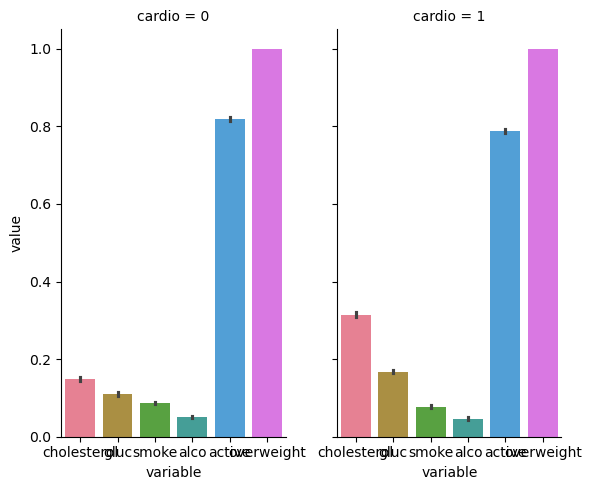

In [175]:
id_vars = ['cholesterol',
         'gluc',
         'smoke',
        'alco',
         'active',
         'overweight']
df_elt = pd.melt(df, id_vars = ['cardio'], value_vars = id_vars)
sns.catplot(
    data = df_elt, x="variable",y="value", col="cardio",
    kind = "bar", height= 5, aspect=.6,
    palette="husl"
  
)

- QUESTION 4

- ce code python nous permet de suprimer, de nettoyer les donnees qui sont incorrecte, fausses
pour pouvoir avoir des donnees beaucoup plus fiables et pour pas que ca aie un impacte negative sur l'analyse des donnes apres.

In [161]:
df = df[df['ap_lo'] <= df['ap_hi']]
height_lower = df['height'].quantile(0.025)
height_upper = df['height'].quantile(0.975)
df= df[(df['height'] >= height_lower) & (df['height'] <= height_upper)]
weight_lower = df['weight'].quantile(0.025)
weight_upper = df['weight'].quantile(0.975)
df= df[(df['weight'] >= weight_lower) & (df['weight'] <= weight_upper)]

df.shape[0]

46970

- QUESTION 5

- ce code nous permet de comprendre comment les variable sont lies les uns aux autres et de permettre une analyse plus claire
- heatmap est une représentation visuelle de données qui utilise une gradation de couleurs pour mettre en évidence les zones où les valeurs sont plus élevées ou plus faibles.

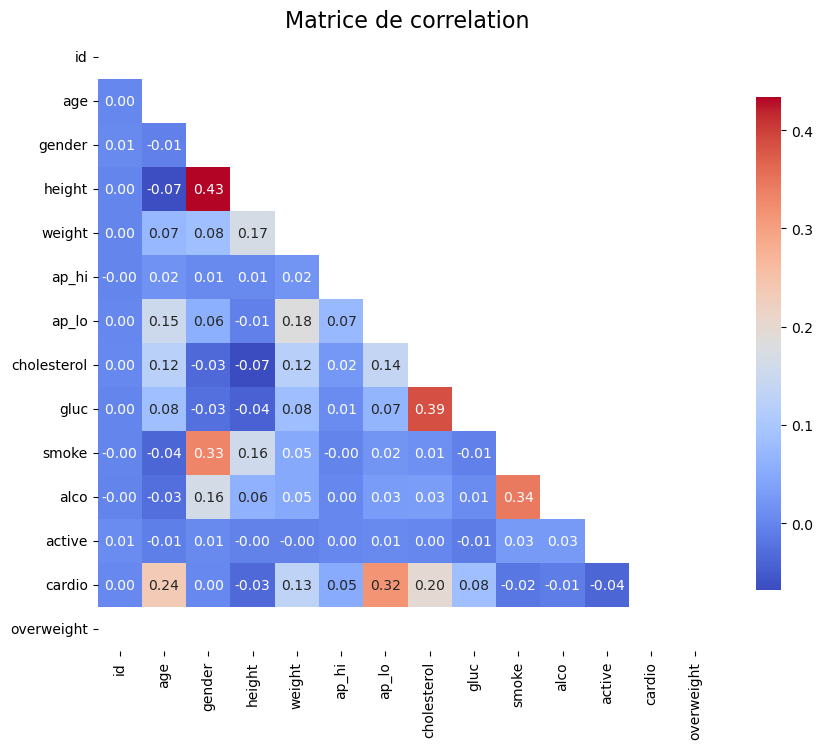

In [178]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.figure(figsize = (10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm",cbar_kws={"shrink":0.8})
plt.title("Matrice de correlation", fontsize = 16)
plt.show()
